In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('C:/Users/yashs/Case.csv')

In [17]:
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


In [18]:
print(df.isnull().sum())

Retailer Name              0
Brand1                     0
Brand2                     0
Brand3                     0
Brand4                     0
Brand5                     0
Brand6                     0
Brand7                     0
Brand8                     0
Brand9                     0
Brand10                    0
Brand11                    0
Brand12                    0
Total Sales                0
Number of Brands           0
Category of Retailer    9938
dtype: int64


In [33]:
X = df.values[:,[-3,-2]]

In [34]:
print (X)

[[30826.61 1]
 [67713.1692 3]
 [65006.4054 3]
 ...
 [0.0 0]
 [48324.574 2]
 [0.0 0]]


In [39]:
X_new=X[:,1]


In [40]:
X_new=np.reshape(X_new,(-1,1))

In [41]:
print(X_new)

[[1]
 [3]
 [3]
 ...
 [0]
 [2]
 [0]]


In [42]:
from sklearn.cluster import KMeans

In [43]:
kmeans = KMeans( n_clusters=3,random_state=10)

In [44]:
Y_pred = kmeans.fit_predict(X_new)

In [45]:
Y_pred

array([0, 2, 2, ..., 0, 2, 0])

In [68]:
fig = plt.figure(figsize=(10, 7))


<Figure size 720x504 with 0 Axes>

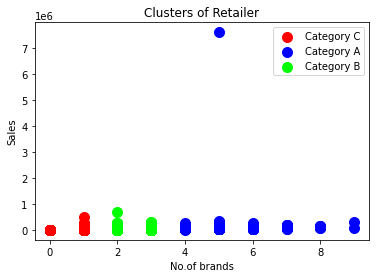

In [98]:
# Visualising the clusters
#plt.scatter(X,Y_pred)
#Y==>0th col(Total sales)
#X==>1st col(no.of brands)
plt.scatter(X[Y_pred == 0, 1], X[Y_pred == 0, 0], s = 100, c = "#ff0000", label = "Category C")
plt.scatter(X[Y_pred == 1, 1], X[Y_pred == 1, 0], s = 100, c = "#0000ff", label = "Category A")
plt.scatter(X[Y_pred == 2, 1], X[Y_pred == 2, 0], s = 100, c = "#00ff00", label = "Category B")
plt.title("Clusters of Retailer")
plt.ylabel("Sales")
plt.xlabel("No.of brands")
plt.legend()
plt.show()








In [101]:
df["Category of Retailer"]=Y_pred
df["Category of Retailer"]=df["Category of Retailer"].map({0:"Category C",1:"Category A",2:"Category B"})
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,Category C
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,Category B
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,Category B
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,Category C
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,Category C


In [105]:
df.to_excel("Retailer Segmentation.xlsx")
df["Category of Retailer"].value_counts()

Category C    7902
Category B    1294
Category A     742
Name: Category of Retailer, dtype: int64